In [27]:
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

Loading the Megaset that we created by combining all the informations.

In [61]:
df_megaset = pd.read_csv('../../data/megaset.csv')
print(df_megaset['Year'].isna().sum())

49640


In [ ]:
#filter the data: 
df_megaset['Name'].isna().sum()



0

## Examining the dataset (modify this part to adapt it to df_megaset)

Languages movie count

In [29]:
df_megaset.value_counts("Languages").head(10)

Languages
english                 33904
hindi                    3106
spanish                  2634
silent film, english     2298
french                   1852
japanese                 1795
italian                  1778
tamil                    1688
malayalam                1398
german                   1179
Name: count, dtype: int64

Countries movie count

In [30]:
df_megaset.value_counts("Countries").head(10)

Countries
united states of america                    30448
india                                        8292
united kingdom                               5366
japan                                        2255
france                                       1862
italy                                        1731
canada                                       1353
argentina                                    1267
united states of america, united kingdom      861
hong kong                                     853
Name: count, dtype: int64

Number of countries with more than 100 movie counts

Total number of countries : 146
Number of countries with more than 100 counts : 52


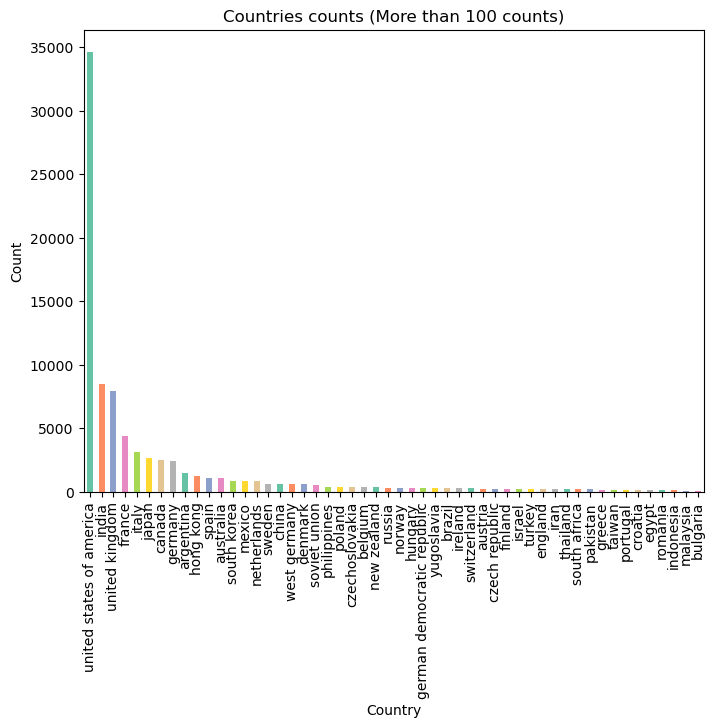

In [31]:
countries_counts = df_megaset['Countries'].str.split(', ').explode().value_counts()
print(f"Total number of countries : {len(countries_counts)}")

count_threshold = 100
filt_countries_count = countries_counts[countries_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_countries_count)}")

colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
filt_countries_count.plot(kind='bar', color=colors)
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

Number of languages with more than 40 movie counts

Total number of languages : 210
Number of countries with more than 40 counts : 60


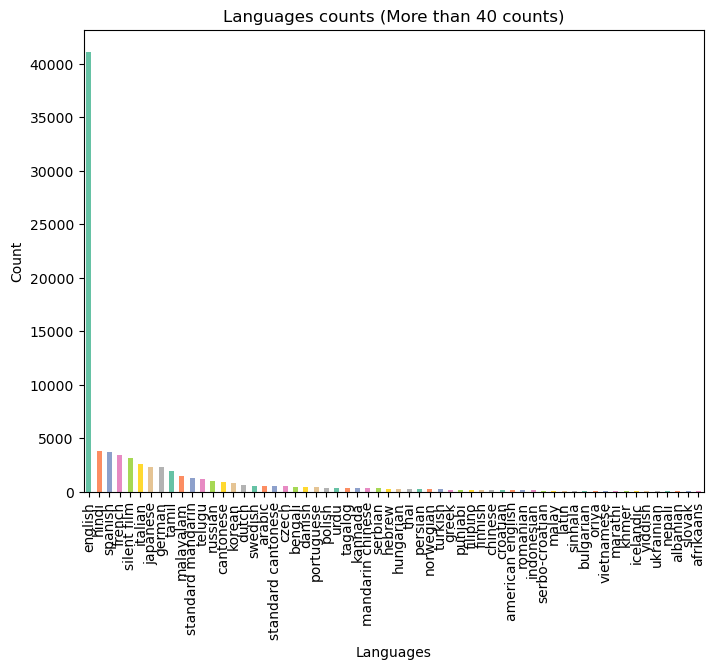

In [32]:
languages_counts = df_megaset['Languages'].str.split(', ').explode().value_counts()
print(f"Total number of languages : {len(languages_counts)}")

count_threshold = 40
filt_languages_counts = languages_counts[languages_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_languages_counts)}")

colors = sns.color_palette("Set2", len(filt_languages_counts))
plt.figure(figsize=(8, 6))
filt_languages_counts.plot(kind='bar', color=colors)
plt.title(f'Languages counts (More than {count_threshold} counts)')
plt.xlabel("Languages")
plt.ylabel("Count")
plt.show()

Defining addition analysis functions

# Need to change all this to be adapted to Year being an integer

In [33]:
def keep_year(s):
    s = str(s)
    if s == 'nan': 
        return
    return int(s[:4])

def filter_year(year):
    if year < 1800:
        return False
    return True

Year movie count

In [34]:
df_megaset.Year = df_megaset.Year.apply(lambda x: keep_year(x))
df_megaset = df_megaset[df_megaset['Year'].apply(lambda x: filter_year(x))]
df_megaset.head()
df_megaset.Year.value_counts()

Year
2006.0    1084
2008.0    1033
2007.0    1020
2005.0     990
2009.0     898
          ... 
1891.0       3
1890.0       2
1893.0       1
1889.0       1
1888.0       1
Name: count, Length: 135, dtype: int64

In [38]:
df_megaset

,Name,Year,Languages,Countries,Genres,Tropes,Budget,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,,1916.0,"silent film, hungarian",hungary,"silent film, drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!women art revolution,NaN,english,"united states of america, canada","lgbt, history, documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,##############################################...,2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,##############################################...,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#1 cheerleader camp,2010.0,NaN,united states of america,"sports, sex comedy, comedy film, comedy, teen",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87068,…all the marbles,1981.0,english,united states of america,"drama, comedy-drama, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
87069,…and there wasn’t everafter…,NaN,english,india,short film,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87070,…men olsenbanden var ikke død,1984.0,norwegian,norway,"crime fiction, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
87071,₤500 reward,1918.0,"silent film, english",NaN,silent film,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Min and MAx Year and Revenue

In [39]:
print(f"Minimum year is {df_megaset.Year.min()}")
print(f"Maximum year is {df_megaset.Year.max()}")
print(f"Minimum revenue is {df_megaset.worldwide_gross.min()}")
print(f"Maximum revenue is {df_megaset.worldwide_gross.max()}")

Minimum year is 1888.0
Maximum year is 2024.0
Minimum revenue is 1961544.0
Maximum revenue is 2776345279.0


Basic Analysis on our Megaset

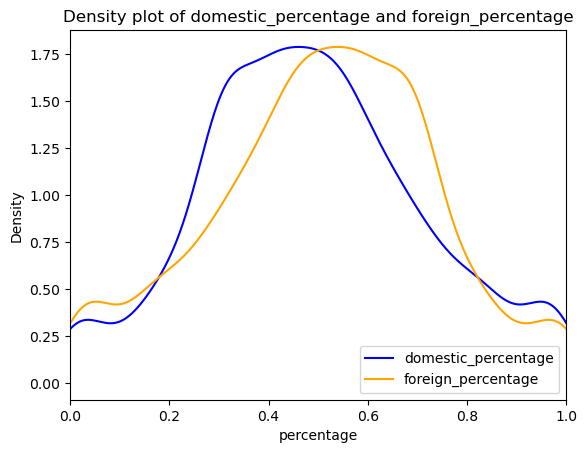

In [40]:
df_copy = df_megaset.copy(deep=True)
df_percentage = df_copy.dropna(subset=['domestic_percentage', 'foreign_percentage'])

#print(df_domestic_percentage.domestic_percentage.min())
#print(df_domestic_percentage.domestic_percentage.max())

df_percentage.domestic_percentage.plot.density(color='blue')
df_percentage.foreign_percentage.plot.density(color='orange')

plt.title('Density plot of domestic_percentage and foreign_percentage')
plt.xlabel('percentage')
plt.xlim(0, 1)
plt.legend(["domestic_percentage", "foreign_percentage"], loc="lower right")
plt.show()

Total number of countries : 146
Number of countries with more than 500 counts : 20


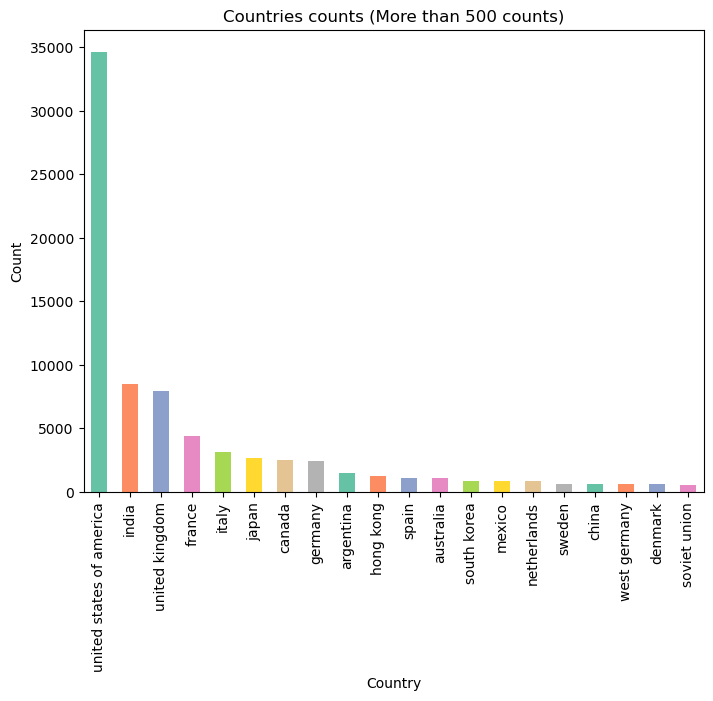

In [41]:
df_countries = df_copy.dropna(subset=['Countries'])
countries_counts = df_countries['Countries'].str.split(', ').explode().value_counts()
print(f"Total number of countries : {len(countries_counts)}")

count_threshold = 500
filt_countries_count = countries_counts[countries_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_countries_count)}")
colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
filt_countries_count.plot(kind='bar', color=colors)
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

This plot shows that the dataset contains a lot more data on the United States. Therefore our analysis will be more US based.

2024.0
Year
1888.0       1
1889.0       1
1893.0       1
1890.0       2
1891.0       3
          ... 
2009.0     898
2005.0     990
2007.0    1020
2008.0    1033
2006.0    1084
Name: count, Length: 135, dtype: int64
16
Counts of Years


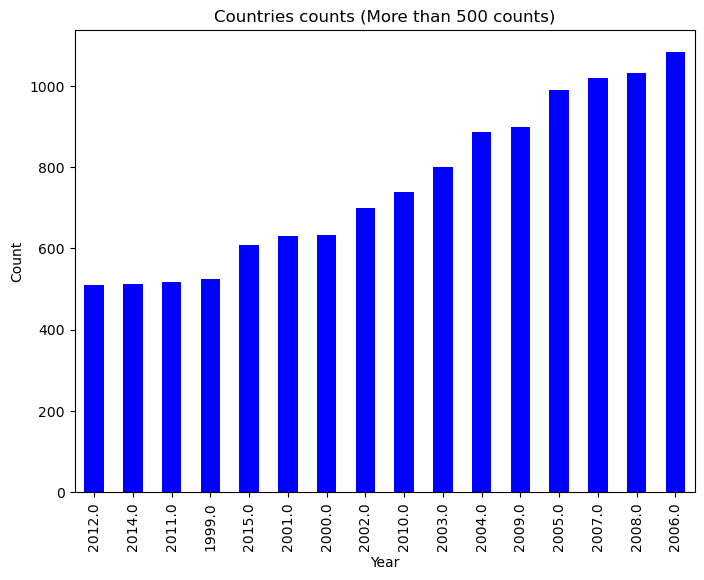

In [58]:
df_copy = df_megaset.copy(deep=True)
df_years = df_copy.dropna(subset=['Year'])
print(df_years['Year'].max())
#df_years = df_years[df_years['Countries'].str.contains('united states', na=False)]
years_count = df_years['Year'].explode().value_counts().sort_values()
print(years_count)
#print(f"Total number of years : {len(years_count)}")

#count_threshold = 1
df_years_count = years_count[years_count > count_threshold]
print(len(df_years_count))
print(f"Counts of Years")
colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
df_years_count.plot(kind='bar', color='blue')
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Genre Preference

Preferences in genre in US vs World for american movies (rank genres based on foreign revenues vs domestic revenues)

# Trope Preference

Preferences in TV tropes in US vs World for american movies (rank tropes based on foreign revenues vs domestic revenues)

# Proportion of Domestic vs Foreign gross for US movies

domestic vs foreign income, total and percentage, for american movies over time

In [43]:
year_min = df_megaset['Year'].min()
year_max = df_megaset['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")

The range of the 'Year' column is: 1888.0 to 2024.0


In [44]:
df_gross = df_megaset.drop(columns=['Budget', 'Languages', 'Genres', 'Tropes'])
df_gross = df_gross[df_gross['Countries'].str.contains('united states', na=False)]
df_gross = df_gross.dropna()
df_gross

,Name,Year,Countries,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
2241,a star is born,1954.0,united states of america,215288866.0,0.493342,221100000.0,0.506658,4.363889e+08
3928,aladdin,1994.0,"united states of america, japan",355559216.0,0.338404,695134737.0,0.661596,1.050694e+09
4096,alice in wonderland,2010.0,united states of america,334191110.0,0.325884,691300000.0,0.674116,1.025491e+09
4097,alice in wonderland,1950.0,united states of america,334191110.0,0.325884,691300000.0,0.674116,1.025491e+09
4106,alice in wonderland,2010.0,united states of america,334191110.0,0.325884,691300000.0,0.674116,1.025491e+09
...,...,...,...,...,...,...,...,...
82202,up,1984.0,united states of america,293004164.0,0.398591,442094918.0,0.601409,7.350991e+08
82203,up,1984.0,united states of america,293004164.0,0.398591,442094918.0,0.601409,7.350991e+08
82657,vanity fair,1932.0,united states of america,16136476.0,0.829077,3326709.0,0.170923,1.946318e+07
82974,vice,2008.0,united states of america,47836282.0,0.628817,28237206.0,0.371183,7.607349e+07


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

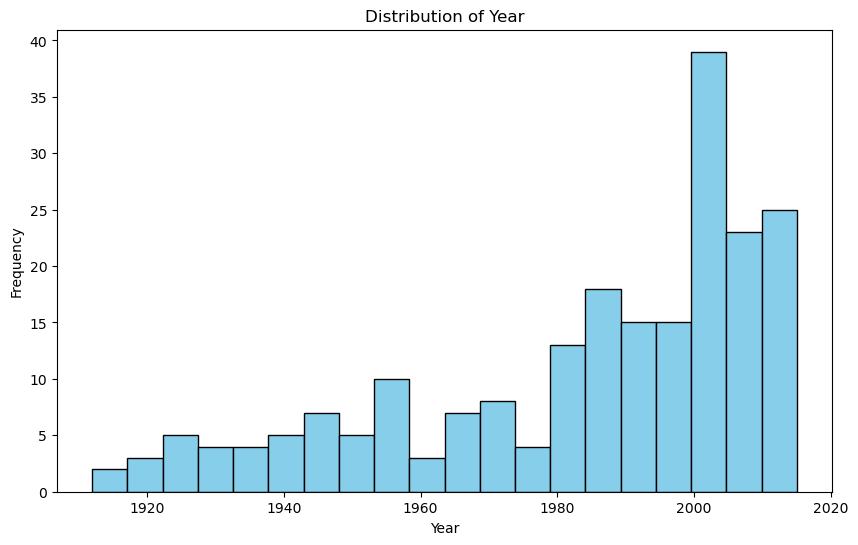

In [45]:
# Plot the histogram for the 'Year' column
plt.figure(figsize=(10, 6))
plt.hist(df_gross['Year'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid

In [46]:
year_min = df_gross['Year'].min()
year_max = df_gross['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")


The range of the 'Year' column is: 1912.0 to 2015.0


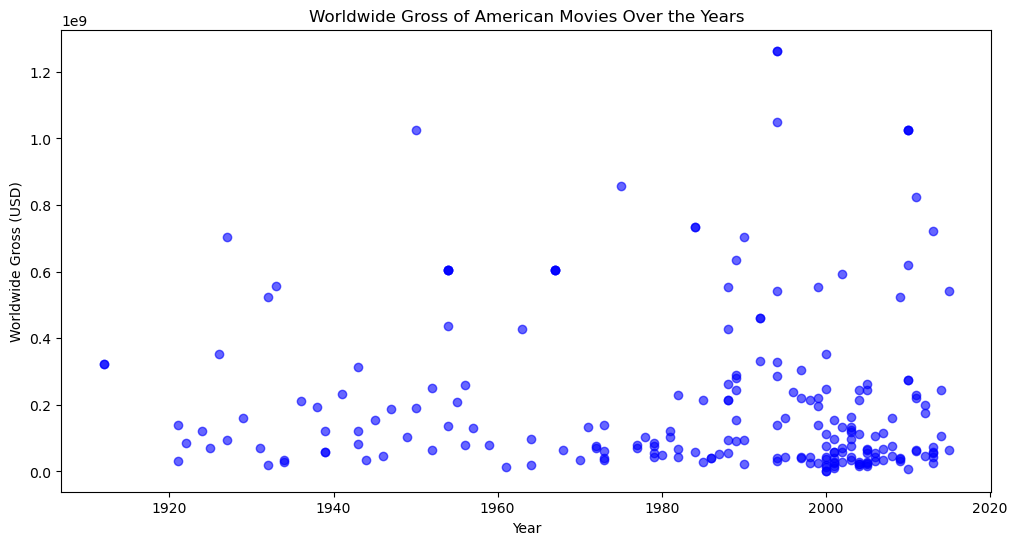

In [47]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_gross['Year'], df_gross['worldwide_gross'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies Over the Years')

# Show the plot
plt.show()

In [48]:
## FILTER FOR years above 1980
df_gross = df_gross[(df_gross['Year'] > 1999)&(df_gross['Year'] < 2017)]

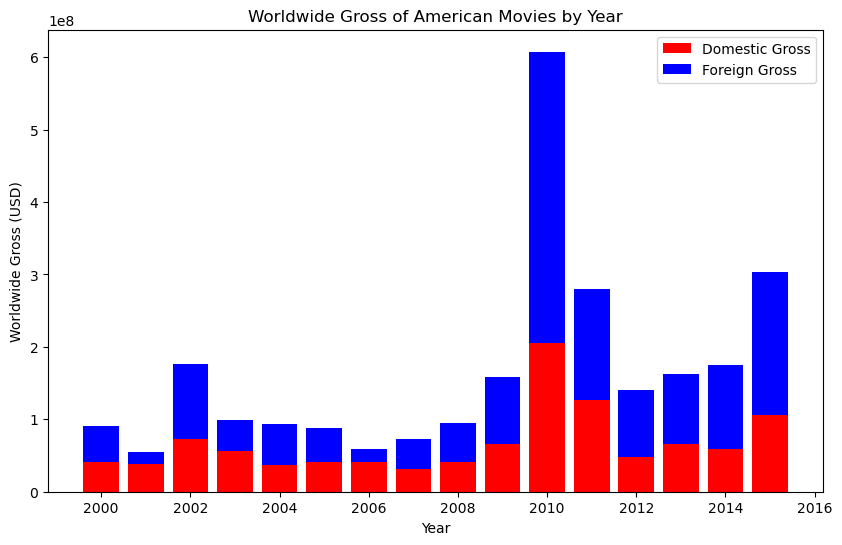

In [49]:
# First, group the data by 'Year' and calculate the sum for each year
yearly_data = df_gross.groupby('Year')[['domestic_gross', 'foreign_gross']].mean()

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['domestic_gross'], color='red', label='Domestic Gross')
plt.bar(yearly_data.index, yearly_data['foreign_gross'], bottom=yearly_data['domestic_gross'], color='blue', label='Foreign Gross')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies by Year')
plt.legend()

# Display the plot
plt.show()

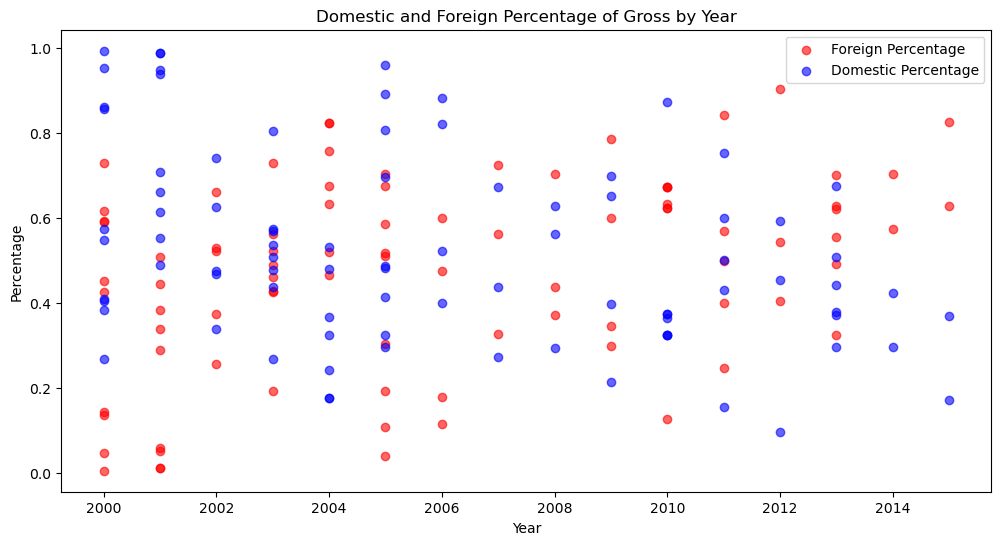

In [50]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot foreign_percentage in red
plt.scatter(df_gross['Year'], df_gross['foreign_percentage'], color='red', label='Foreign Percentage', alpha=0.6)

# Plot domestic_percentage in blue
plt.scatter(df_gross['Year'], df_gross['domestic_percentage'], color='blue', label='Domestic Percentage', alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()

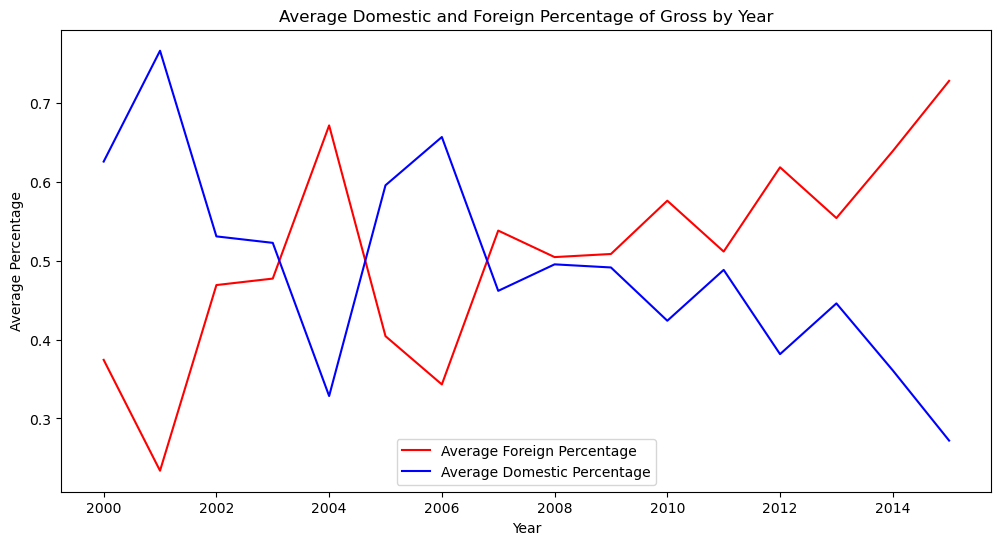

In [51]:
# Calculate the average foreign and domestic percentages for each year
average_percentages = df_gross.groupby('Year')[['foreign_percentage', 'domestic_percentage']].mean()

# Plot the averages
plt.figure(figsize=(12, 6))

# Plot foreign_percentage as a red line
plt.plot(average_percentages.index, average_percentages['foreign_percentage'], color='red', label='Average Foreign Percentage')

# Plot domestic_percentage as a blue line
plt.plot(average_percentages.index, average_percentages['domestic_percentage'], color='blue', label='Average Domestic Percentage')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.title('Average Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()

# Budget Influence

budget vs foreign and domestic income for american movies

In [52]:
def remove_high_val(x):
    x = float(x)
    if x > 1:
        return False
    return True

initial length of the dataset: 87073
Length after removing all the Nans: 3001
-----------------------------------------------
Pearson coeff on budget and domestic
PearsonRResult(statistic=-0.3589762191031142, pvalue=5.838909427515045e-92)
Pearson coeff on budget and foreign
PearsonRResult(statistic=0.3589762191031142, pvalue=5.838909427515045e-92)


,Name,Budget,domestic_percentage,foreign_percentage
85,10 cloverfield lane,5000000.0,0.654010,0.345990
184,12 strong,35000000.0,0.644274,0.355726
188,12 years a slave,20000000.0,0.301875,0.698125
193,127 hours,18000000.0,0.301870,0.698130
204,13 going on 30,37000000.0,0.585487,0.414513


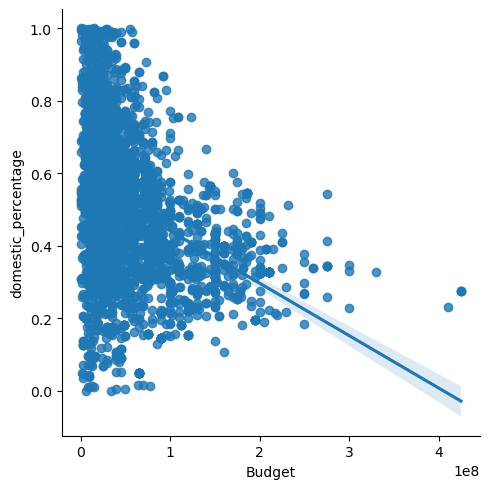

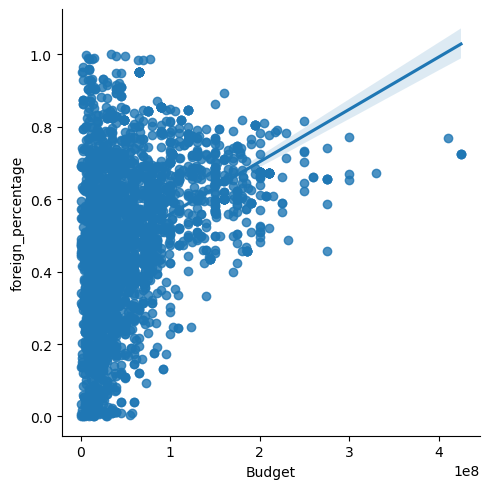

In [55]:
import seaborn as sn
from statsmodels.stats import diagnostic
from scipy import stats

df_meg_copy = df_megaset.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget', 'domestic_percentage', 'foreign_percentage']]

print(f"initial length of the dataset: {len(df_meg_copy)}")

df_meg_copy = df_meg_copy[df_meg_copy['Budget'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['domestic_percentage'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['foreign_percentage'].notna()]

print(f"Length after removing all the Nans: {len(df_meg_copy)}")
print("-----------------------------------------------")
df_meg_copy = df_meg_copy[df_meg_copy.foreign_percentage < 1]
#print(len(ind))
#df_meg_copy.foreign_percentage = df_meg_copy.foreign_percentage.apply(lambda x: remove_special_character(x))

sn.lmplot(x='Budget',y='domestic_percentage', data=df_meg_copy)

print("Pearson coeff on budget and domestic")
print(stats.pearsonr(df_meg_copy['Budget'],df_meg_copy['domestic_percentage']))

sn.lmplot(x='Budget',y='foreign_percentage', data=df_meg_copy)
print("Pearson coeff on budget and foreign")
print(stats.pearsonr(df_meg_copy['Budget'],df_meg_copy['foreign_percentage']))
df_meg_copy.head()




In [54]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----------- ---------------------------- 2.9/9.9 MB 16.8 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.9 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 16.6 MB/s eta 0:00:00


# Market Changes

⁠let's look for movie industry big numbers internationally - market size for countries over time, is america losing its market share

# Languages ?

More languages = more world audience? for american movies... not gonna give much if it's just american movies